In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Wenu.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
Run            100000 non-null int64
Event          100000 non-null int64
pt             100000 non-null float64
eta            100000 non-null float64
phi            100000 non-null float64
Q              100000 non-null int64
type           100000 non-null object
delEta         100000 non-null int64
delPhi         100000 non-null int64
sigmaEtaEta    100000 non-null float64
HoverE         100000 non-null float64
isoTrack       100000 non-null float64
isoEcal        100000 non-null float64
isoHcal        100000 non-null float64
MET            100000 non-null float64
phiMET         100000 non-null float64
dtypes: float64(10), int64(5), object(1)
memory usage: 12.2+ MB
None
      Run      Event       pt     eta     phi  Q type  delEta  delPhi  \
0  167676  328843401  38.6387 -0.8499  1.8486 -1   EB       0       0   
1  167676  328836311  59.1666 -2.1095 -2.5163  1   EE       0 

In [14]:
typeEB=df.loc[(df.type=="EB")]
typeEE=df.loc[(df.type=="EE")]

In [59]:
zmienna=["sigmaEtaEta","HoverE","isoTrackpt","isoEcalpt","isoHcalpt"]
ciecia={}
ciecia["EB"]=[0.011,0.045,0.1,0.08,0.1]
ciecia["EE"]=[0.033,0.025,0.04,0.06,0.03]
newdata = pd.DataFrame().assign(type=df.type,
                            sigmaEtaEta=df.sigmaEtaEta, 
                            HoverE=df.HoverE, 
                            isoTrackpt=df.isoTrack/df.pt, 
                            isoEcalpt=df.isoEcal/df.pt,
                            isoHcalpt=df.isoHcal/df.pt)

In [90]:
region="EB"
all=len(newdata.loc[(newdata.type==region)])
for i in range(len(zmienna)):
    print(len(newdata.loc[(newdata[zmienna[i]]<ciecia[region][i]) & (newdata.type==region)])/all)
    


0.9122427469906251
0.892180248146299
0.5887095283001423
0.4271555629518685
0.8217858397588802


In [91]:
region="EE"
all=len(newdata.loc[(newdata.type==region)])
for i in range(len(zmienna)):
    print(len(newdata.loc[(newdata[zmienna[i]]<ciecia[region][i]) & (newdata.type==region)])/all)

0.9641760491299898
0.7503865502297524
0.5705481391145277
0.6681547943117229
0.4514906683507916


In [99]:
region="EB"
all=len(newdata.loc[(newdata.type==region)])
for i in range(len(zmienna)+1):
    data=newdata.loc[newdata.type==region]
    for j in range(len(zmienna)):
        if(j!=i): data=data.loc[(data[zmienna[j]]<ciecia[region][j]) & (data.type==region)]
    print(len(data)/all)


0.34405798709343394
0.3420979641648638
0.3722379393872155
0.5071651781586879
0.34289306780569884
0.3343503263623084


In [98]:
region="EE"
all=len(newdata.loc[(newdata.type==region)])
for i in range(len(zmienna)+1):
    data=newdata.loc[newdata.type==region]
    for j in range(len(zmienna)):
        if(j!=i): data=data.loc[(data[zmienna[j]]<ciecia[region][j]) & (data.type==region)]
    print(len(data)/all)

0.2708029356039983
0.28404364206537597
0.3260306191336919
0.30412247653476776
0.3882706504932599
0.2669700995230732


(array([2.9000e+01, 1.1700e+02, 6.0970e+03, 4.2738e+04, 3.5130e+03,
        1.0470e+03, 4.0100e+02, 1.0900e+02, 2.5000e+01, 5.0000e+00]),
 array([0.     , 0.00272, 0.00544, 0.00816, 0.01088, 0.0136 , 0.01632,
        0.01904, 0.02176, 0.02448, 0.0272 ]),
 <a list of 10 Patch objects>)

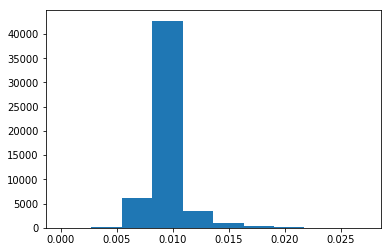

In [110]:
x=newdata.loc[(newdata.type==region)]
plt.hist(x.sigmaEtaEta)

(array([1.8000e+01, 1.2000e+01, 4.3000e+01, 7.6000e+01, 7.2300e+02,
        6.3570e+03, 2.9313e+04, 1.4613e+04, 3.9630e+03, 3.0240e+03,
        3.3160e+03, 3.4290e+03, 3.5060e+03, 3.9420e+03, 4.1720e+03,
        3.5440e+03, 3.4360e+03, 3.1260e+03, 2.7530e+03, 2.7930e+03,
        2.2640e+03, 1.6670e+03, 1.2910e+03, 9.1800e+02, 6.0100e+02,
        4.1300e+02, 2.6500e+02, 1.6700e+02, 8.8000e+01, 4.7000e+01,
        4.0000e+01, 2.7000e+01, 1.1000e+01, 1.4000e+01, 6.0000e+00,
        5.0000e+00, 8.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.      , 0.001368, 0.002736, 0.004104, 0.005472, 0.00684 ,
        0.008208, 0.009576, 0.010944, 0.012312, 0.01368 , 0.015048,
        0.016416, 0.017784, 0.019152, 0.02052 , 0.021888, 0.023256,
        0.024624, 0.025992, 0.02736 , 0.028728, 0.030096, 0.031464,
        0.032832, 0.0342  , 0.035568, 0.036936

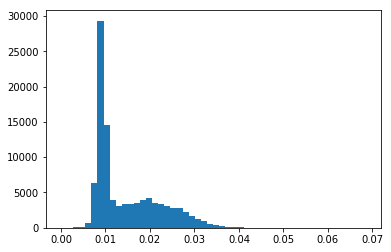

In [104]:
plt.hist(newdata.sigmaEtaEta,bins=50)

In [105]:
region="EB"
data=newdata.loc[(newdata.type==region)]
for i in range(zmienna):
    name=zmienna[i]
    x=data.name
    y=data.loc[(data.name<ciecia[region][i])]
    plt.hist()
    plt=typeEB[name].plot(kind="hist",bins=50,range=[20,120])
    plt.set_xlabel(name)
    plt.set_ylabel("Number of events")
    fig = plt.get_figure()
    fig.savefig('EB/EB_'+name+'.pdf')

NameError: name 'zakres' is not defined